In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import yfinance as yf

In [4]:
yf.pdr_override()

In [6]:
ticker= 'PG'
data= pd.DataFrame()
data[ticker] = wb.get_data_yahoo(ticker, start='2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [7]:
# pct_change():
# Fornece o retorno simples a partir de uma base de dados


log_returns= np.log(1 + data.pct_change())

In [8]:
log_returns.tail()

,PG
Date,
2024-07-15,-0.012259
2024-07-16,0.014298
2024-07-17,0.014805
2024-07-18,-0.005919
2024-07-19,0.003143


<Axes: xlabel='Date'>

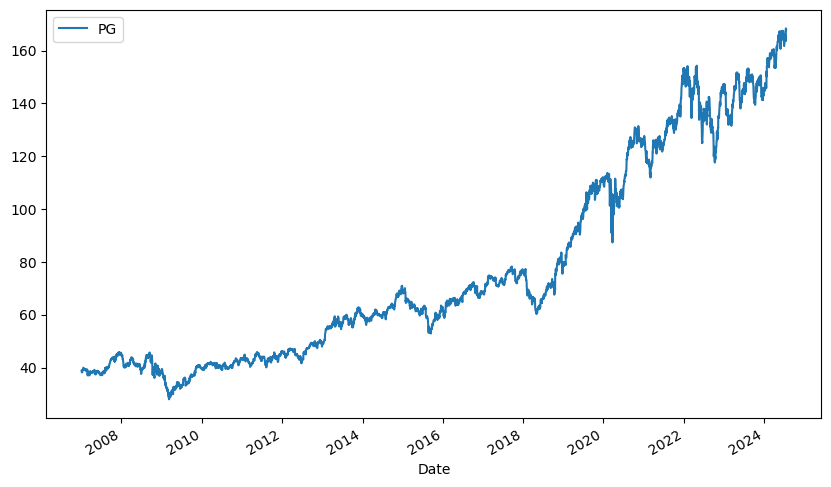

In [13]:
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

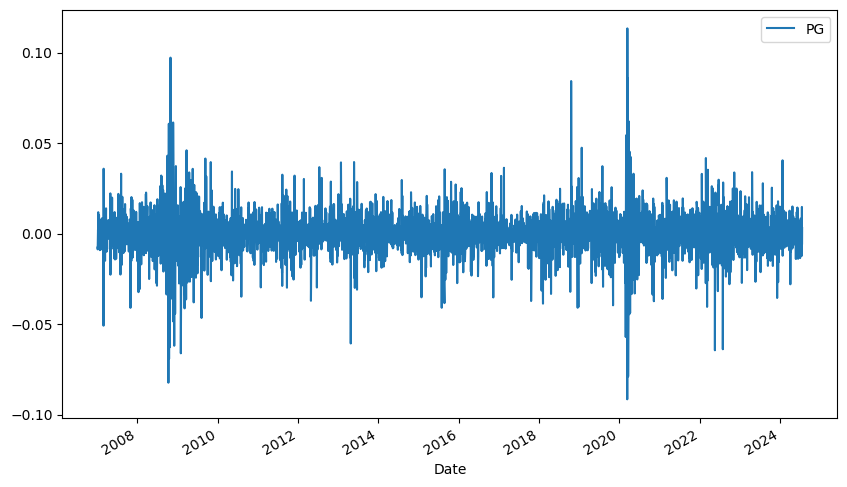

In [14]:
log_returns.plot(figsize=(10,6))

In [15]:
u = log_returns.mean()
u

PG    0.000332
dtype: float64

In [16]:
var= log_returns.var()
var

PG    0.000135
dtype: float64

drif1= u - 0.5 x var

In [17]:
drift = u - (0.5 * var)
drift

PG    0.000264
dtype: float64

In [18]:
stdev=  log_returns.std()
stdev

PG    0.011631
dtype: float64

Parte II

In [19]:
type(drift)

pandas.core.series.Series

In [20]:
type(stdev)

pandas.core.series.Series

In [21]:
np.array(drift)

array([0.000264])

In [22]:
# object.values:
# transfere o objeto para um array numpy
drift.values

array([0.000264])

In [23]:
stdev.values

array([0.01163133])

Z corresponde a distância entre a média e os eventos, expresso pelo número de desvios padrão

In [27]:
# Z
norm.ppf(0.95)

1.6448536269514722

In [25]:
x = np.random.rand(10,2)
x

array([[0.89826489, 0.67033721],
       [0.69504239, 0.92271835],
       [0.02920122, 0.82617716],
       [0.33233563, 0.06279589],
       [0.44755911, 0.81344925],
       [0.69813384, 0.08850565],
       [0.84889545, 0.20170142],
       [0.22845022, 0.33254812],
       [0.12707011, 0.96643675],
       [0.26435054, 0.00576365]])

In [26]:
norm.ppf(x)

array([[ 1.27172676,  0.4408445 ],
       [ 0.51019449,  1.42359654],
       [-1.89266497,  0.9391657 ],
       [-0.43347289, -1.53171901],
       [-0.13183068,  0.89067884],
       [ 0.51904075, -1.35001462],
       [ 1.03170762, -0.83555934],
       [-0.74396037, -0.43288785],
       [-1.14035068,  1.83082612],
       [-0.62999008, -2.52629386]])

In [28]:
Z= norm.ppf(np.random.rand(10,2))
Z

array([[-0.83010932,  1.03212662],
       [ 1.43724716,  0.24173394],
       [ 0.22140823,  0.55377699],
       [-0.1052725 , -0.55670786],
       [-0.13921646, -1.1893067 ],
       [ 1.1708326 ,  0.22123128],
       [ 0.88018811, -1.5785986 ],
       [-0.36626885,  1.43799853],
       [ 0.59126977, -1.20476842],
       [ 0.53455129,  0.14039273]])

In [29]:
t_intervals= 1000
iterations= 10

daily_returns= e**r


r= drift + stdev . Z

In [30]:
daily_returns= np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [31]:
# Retorna uma matriz de mil linhas x dez colunas
# De possivel preços futuros das ações
daily_returns

array([[1.00800927, 0.9809614 , 0.99653457, ..., 1.00591936, 1.00175279,
        1.01309323],
       [0.97970073, 0.99710762, 0.99670708, ..., 0.99921395, 0.99807692,
        1.01338932],
       [1.00815535, 1.00576019, 1.00088779, ..., 1.00369815, 1.00006737,
        1.00806855],
       ...,
       [1.02703846, 1.00592249, 1.02412922, ..., 1.01057925, 0.999963  ,
        1.01492694],
       [1.00576265, 0.98751352, 1.0007115 , ..., 0.99947072, 0.9934745 ,
        0.99859383],
       [1.00540589, 1.03951922, 1.00002074, ..., 1.00373798, 1.00847662,
        1.00483289]])

Parte III

Criando uma lista de Preços

St= S0 . daily_return t

St+1= S1 . daily_return t+1

St+999 = St+998 . daily_return t+999

* O primeiro preço de ação da lista deve ser o último do conjunto de dados

In [33]:
S0 = data.iloc[-1]
S0

PG    167.960007
Name: 2024-07-19 00:00:00, dtype: float64

In [34]:
price_list= np.zeros_like(daily_returns)

In [35]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
price_list[0] = S0
price_list

array([[167.96000671, 167.96000671, 167.96000671, ..., 167.96000671,
        167.96000671, 167.96000671],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [37]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [38]:
price_list

array([[167.96000671, 167.96000671, 167.96000671, ..., 167.96000671,
        167.96000671, 167.96000671],
       [164.55054035, 167.47420171, 167.4069272 , ..., 167.82798139,
        167.63700625, 170.20887635],
       [165.89250754, 168.43888421, 167.55554885, ..., 168.44863429,
        167.64829943, 171.58221453],
       ...,
       [337.70611022, 439.66568541, 184.21752371, ..., 192.65856961,
        274.26826074, 301.90925469],
       [339.65219144, 434.17580984, 184.3485945 , ..., 192.55659899,
        272.47852199, 301.48472046],
       [341.48831359, 451.33409957, 184.35241801, ..., 193.27637231,
        274.78821874, 302.94176216]])

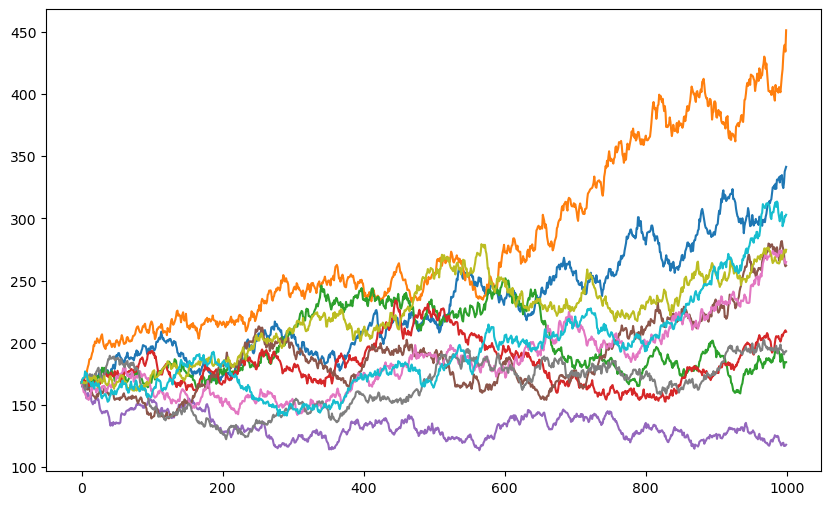

In [39]:
plt.figure(figsize=(10,6))
plt.plot(price_list)